# Preliminary Specific Heat calculation

# Introduction

The idea and equations for this notebook come from this paper: V. Kaiser, et al., ”Emergent electrochemistry in spin ice: Debye-Huckel theory and beyond,” Physical Review B, 98, 144413 (2018). Equations 10 - 15 are the primary ones used here.

In [1]:
###Imports###
%matplotlib notebook

import numpy as np
import mpmath as mp
mp.dps = 15; mp.pretty = True
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
import random

In [ ]:
###Values and variables####
mu_0 = 4 * np.pi * 10**7 #vacuum permeability
l_D = 0 #Debye length
l_T = (mu_0 * Q * Q)/(k_B * T * 8 * np.pi) #Bjerrum length
a = 4.34 * 10**-10 #lattice spacing of diamond lattice
k_B = 1.38064852 * 10**-23 #Boltzmann constant
T = 0.3 #Temperature in Kelvins (parameter)
Q = 4.28 * 10**-13 #magnetic charge

vol_per_site = ((10.1**3)/8) * 10**-30

#N = 0 #number of single charge monopoles
#N_2 = 0 #number of double charge monopoles

##activity coefficients of the fluid
gamma = 1
gamma_2 = 1

##volume density of charges
rho = n/vol_per_site
rho_2 = n_2/vol_per_site

##interaction strength for magnetolyte with single and double charged monopoles
rho_I = rho + 4*rho_2

Equations!

In [ ]:
###Equations###

l_D = np.sqrt((k_B * T)/(Q^^2 * rho_I * mu_0))

mu^tilde = mu - (k_B * T * np.log(gamma))
mu^tilde_2 = mu_2 - (k_B * T * np.log(gamma))

delta^DH = k_B * T * ((l_D)/(L_T + a))

In [ ]:
###loop###
#idea is start with two values for each quantity needed, and loop over calculating them until the second newest
#value and the newest value are within some arbitrary difference of each other

##beta = 1/(k_B * T) Correct

# n = rho * volume/site
# vol/site = (10.1^3)/8 * 10^-30 m^3
# Q = 4.28 * 10^-13
# a = 4.34 * 10^-10 m
# mu_0 = 4 Pi * 10^-7
# remember that temperature is a parameter, to be adjusted arbitrarily
# dysprosium titanate chemical potential = -4.35 K (remember mu is negative)
# N_0 total number of sites - don't worry about this, divide specific heat by it to get specific heat per site, we can use this instead

n = (4/3 * np.exp(beta * mu^tilde))/(1 + 1/3( 4* np.exp(beta * mu^tilde) + np.exp(beta * mu^tilde_2)))
n_2 = (1/3 * np.exp(beta * mu^tilde_2))/(1 + 1/3( 4* exp ^ (beta * mu^tilde) + np.exp(beta * mu^tilde_2)))

l_D = np.sqrt((k_B * T)/((Q**2) * rho_I * mu_0))


In [ ]:
###constants###

mu_0 = 4 * np.pi * 10**-7 #vacuum permeability
a = 4.34 * 10**-10 #lattice spacing of diamond lattice
Q = 4.28 * 10**-13 #magnetic charge
vol_per_site = ((10.1**3)/8) * 10**-30

k_B = 1.38064852 * 10**-23 #Boltzmann constant
T = 10 #Temperature in Kelvins (parameter)
beta = 1/(k_B * T)

l_T = (mu_0 * Q * Q)/(k_B * T * 8 * np.pi) #Bjerrum length

###Single monopole model only###
old_mu = 0
new_mu = -4.35 * k_B
init_mu = -4.35 * k_B
beta = 1/(k_B * T)

while np.abs(new_mu - old_mu) > (10**-27) :
    #print("new mu:", new_mu)
    old_mu = new_mu #if new and old values not close enough, new replaces old
    #new number of monopoles
    n = (4/3 * np.exp(beta * old_mu))/(1 +(1/3 * ( 4 * np.exp(beta * old_mu))))
    print("n:", n)
    
    #calculating new Debye length
    rho = n/vol_per_site
    print("rho:", rho)
    l_D = np.sqrt((k_B * T)/(Q * Q * rho * mu_0))
    print("l_D: ", l_D)
    print("l_T:", l_T)
    
    deltaDH = k_B * T * ((l_T)/(l_D + a))
    new_mu = init_mu + deltaDH
    print("deltaDH:",deltaDH)
    print("mu:", new_mu)
    #print(old_mu)
    #print(np.abs(new_mu - old_mu))
    print("")
#else:
print("done")

In [2]:
#####SINGLE MONOPOLE MODEL####
###constants###

mu_0 = 4 * np.pi * 10**-7 #vacuum permeability
a = 4.34 * 10**-10 #lattice spacing of diamond lattice
Q = 4.28 * 10**-13 #magnetic charge
vol_per_site = ((10.1**3)/8) * 10**-30
N_0 = 6.02214 * 10**23 #Total number of site, avagadro's number
k_B = 1.38064852 * 10**-23 #Boltzmann constant
T = 0.1 #Temperature in Kelvins (parameter)
beta = 1/(k_B * T)

l_T = (mu_0 * Q * Q)/(k_B * T * 8 * np.pi) #Bjerrum length

###Single monopole model only###
old_mu = 0
new_mu = -4.35 * k_B
init_mu = -4.35 * k_B
beta = 1/(k_B * T)

##array initialisation##
TempArray = []
SpecHeatArray = []
muSingleArray = []

while T <= 60 :
    
    old_mu = 0
    new_mu = -4.35 * k_B
    init_mu = -4.35 * k_B
    beta = 1/(k_B * T)
    l_T = (mu_0 * Q * Q)/(k_B * T * 8 * np.pi)
    print("Temperature:", T)
    
    
    while np.abs(new_mu - old_mu) > (10**-27) :
        #print("new mu:", new_mu)
        old_mu = new_mu #if new and old values not close enough, new replaces old
        #new number of monopoles
        n = (4/3 * np.exp(beta * old_mu))/(1 +(1/3 * ( 4 * np.exp(beta * old_mu))))
        #print("n:", n)
        
        #calculating new Debye length
        rho = n/vol_per_site
        #print("rho:", rho)
        l_D = np.sqrt((k_B * T)/(Q * Q * rho * mu_0)) #Deby length Calc
        #print("l_D: ", l_D)
        #print("l_T:", l_T)
        
        deltaDH = k_B * T * ((l_T)/(l_D + a))
        new_mu = init_mu + deltaDH
        #print("deltaDH:",deltaDH)
        print("mu:", new_mu)
        #print(old_mu)
        #print(np.abs(new_mu - old_mu))
        #print("")
    
    ##Calculates the differential of monopole density n wit respect to Temperature, used to calculate specific heat
    differential = mp.diff(lambda t:((4/3 * mp.exp((1/(k_B * t)) * old_mu))/(1 +(1/3 * ( 4 * mp.exp((1/(k_B * t)) * old_mu))))), T)
    #differential = mp.diff(lambda t:((4/3 * mp.exp((1/(k_B * t)) * (init_mu + (k_B * t * ((l_T)/(l_D + a)))) ))/(1 +(1/3 * (4 * mp.exp((1/(k_B * t)) * (init_mu + (k_B * t * ((l_T)/(l_D + a)))) ))))), T)
    SpecHeatVal = - N_0 * (new_mu * float(differential))
    print("differential of :", differential)
    print("Specific Heat Value:", SpecHeatVal)
    
    muSingleArray= np.append(muSingleArray, new_mu)
    TempArray = np.append(TempArray, T)
    SpecHeatArray = np.append(SpecHeatArray, SpecHeatVal)
    T += 0.1
    print("done")
print("")
print("final")
print("Temperature values:", TempArray)
print("Specific Heat array:", SpecHeatArray)

Temperature: 0.1
mu: -6.00582104837012e-23
differential of : 7.44077257693099e-17
Specific Heat Value: 2.6911708253309265e-15
done
Temperature: 0.2
mu: -6.005311936667918e-23
mu: -6.005311467204656e-23
differential of : 5.20267803823837e-8
Specific Heat Value: 1.881539480633626e-06
done
Temperature: 0.30000000000000004
mu: -5.990332817724909e-23
mu: -5.990042698294795e-23
mu: -5.990037212749097e-23
differential of : 3.36756875424542e-5
Specific Heat Value: 0.0012147777795462609
done
Temperature: 0.4
mu: -5.926172600738756e-23
mu: -5.920457937712267e-23
mu: -5.920033145830483e-23
mu: -5.920001488790048e-23
differential of : 0.000789850552499634
Specific Heat Value: 0.02815902347044721
done
Temperature: 0.5
mu: -5.806897079577834e-23
mu: -5.779383872193532e-23
mu: -5.775325246267062e-23
mu: -5.774721165952002e-23
mu: -5.774631136942103e-23
differential of : 0.0051904357375419
Specific Heat Value: 0.18050070988522904
done
Temperature: 0.6
mu: -5.659850964820105e-23
mu: -5.595223709621085e

mu: -4.7969971642535094e-23
mu: -4.796988707155071e-23
differential of : 0.0260541270159112
Specific Heat Value: 0.7526552055776307
done
Temperature: 5.799999999999995
mu: -4.8232114402613336e-23
mu: -4.800399453635475e-23
mu: -4.7999741571077926e-23
mu: -4.7999662334012526e-23
differential of : 0.0252192005845646
Specific Heat Value: 0.7289879434665357
done
Temperature: 5.899999999999995
mu: -4.825633367389479e-23
mu: -4.8033412047733127e-23
mu: -4.802934017715794e-23
mu: -4.802926584884327e-23
differential of : 0.0244229788250307
Specific Heat Value: 0.7064077069674195
done
Temperature: 5.999999999999995
mu: -4.8280588565173885e-23
mu: -4.8062662162308645e-23
mu: -4.805876067031592e-23
mu: -4.805869086631071e-23
differential of : 0.02366316972266
Specific Heat Value: 0.6848503823733975
done
Temperature: 6.099999999999994
mu: -4.830486134403747e-23
mu: -4.809173828453061e-23
mu: -4.808799726145739e-23
mu: -4.8087931633517754e-23
differential of : 0.0229376427349125
Specific Heat Value

mu: -4.894237737760571e-23
mu: -4.894111832437383e-23
mu: -4.8941104994714983e-23
differential of : 0.0100093789769276
Specific Heat Value: 0.29500661279434115
done
Temperature: 9.499999999999982
mu: -4.908217606805613e-23
mu: -4.896496990573483e-23
mu: -4.896374377832146e-23
mu: -4.8963730954298034e-23
differential of : 0.00980592295785972
Specific Heat Value: 0.28914376202598685
done
Temperature: 9.599999999999982
mu: -4.910294956254898e-23
mu: -4.898739309895691e-23
mu: -4.8986198701375626e-23
mu: -4.898618635869691e-23
differential of : 0.00960859650484883
Specific Heat Value: 0.28345520375608607
done
Temperature: 9.699999999999982
mu: -4.912359512263676e-23
mu: -4.90096487882827e-23
mu: -4.9008484980192735e-23
mu: -4.9008473095979426e-23
differential of : 0.00941715728510614
Specific Heat Value: 0.2779341060544158
done
Temperature: 9.799999999999981
mu: -4.914411322647846e-23
mu: -4.9031738801200153e-23
mu: -4.903060449475726e-23
mu: -4.9030593047445465e-23
differential of : 0.009

differential of : 0.00318310296740506
Specific Heat Value: 0.0963679193374386
done
Temperature: 16.99999999999997
mu: -5.033966237250876e-23
mu: -5.0286791316223215e-23
mu: -5.028650664841522e-23
differential of : 0.00314649931031003
Specific Heat Value: 0.09528618847137418
done
Temperature: 17.099999999999973
mu: -5.035310723786653e-23
mu: -5.030066489250805e-23
mu: -5.030038441351851e-23
differential of : 0.00311052628686082
Specific Heat Value: 0.09422280469332998
done
Temperature: 17.199999999999974
mu: -5.036648358582537e-23
mu: -5.0314464158675365e-23
mu: -5.031418778392838e-23
differential of : 0.00307516947826677
Specific Heat Value: 0.09317735314342904
done
Temperature: 17.299999999999976
mu: -5.037979201456641e-23
mu: -5.0328189823726976e-23
mu: -5.0327917470826746e-23
differential of : 0.00304041487526274
Specific Heat Value: 0.09214943064768562
done
Temperature: 17.399999999999977
mu: -5.039303311554261e-23
mu: -5.0341842587187115e-23
mu: -5.0341574175849477e-23
differentia

mu: -5.1169317074578245e-23
differential of : 0.00152391338973302
Specific Heat Value: 0.046959206882924265
done
Temperature: 24.70000000000008
mu: -5.121043647108733e-23
mu: -5.1179164925454093e-23
mu: -5.117905510990338e-23
differential of : 0.00151182637169193
Specific Heat Value: 0.046595612809314235
done
Temperature: 24.800000000000082
mu: -5.121995442944159e-23
mu: -5.118886245109249e-23
mu: -5.118875377252085e-23
differential of : 0.00149988340495453
Specific Heat Value: 0.04623628201956484
done
Temperature: 24.900000000000084
mu: -5.122943500848332e-23
mu: -5.119852090595646e-23
mu: -5.1198413348359585e-23
differential of : 0.0014880822038822
Specific Heat Value: 0.04588114767178359
done
Temperature: 25.000000000000085
mu: -5.1238878468452426e-23
mu: -5.120814057269019e-23
mu: -5.120803412034997e-23
differential of : 0.00147642052803551
Specific Heat Value: 0.04553014423378187
done
Temperature: 25.100000000000087
mu: -5.124828506702112e-23
mu: -5.1217721730986283e-23
mu: -5.121

mu: -5.182152567513911e-23
mu: -5.1821470971493216e-23
differential of : 0.000892839483551095
Specific Heat Value: 0.02786339114483684
done
Temperature: 32.40000000000019
mu: -5.1850045275819755e-23
mu: -5.1828893227904336e-23
mu: -5.182883896574041e-23
differential of : 0.00088743678927935
Specific Heat Value: 0.027698723594334538
done
Temperature: 32.50000000000019
mu: -5.1857294196464136e-23
mu: -5.183623692867739e-23
mu: -5.1836183103181994e-23
differential of : 0.000882083273306104
Specific Heat Value: 0.027535530600178704
done
Temperature: 32.60000000000019
mu: -5.1864520092687967e-23
mu: -5.1843556915688115e-23
mu: -5.184350352211422e-23
differential of : 0.000876778338835711
Specific Heat Value: 0.027373794486152743
done
Temperature: 32.700000000000195
mu: -5.187172309454854e-23
mu: -5.185085332600526e-23
mu: -5.185080035967113e-23
differential of : 0.000871521398112029
Specific Heat Value: 0.027213497841211194
done
Temperature: 32.800000000000196
mu: -5.187890333104682e-23
mu:

mu: -5.2343309614624664e-23
mu: -5.2327793402650446e-23
mu: -5.232776230251657e-23
differential of : 0.000586724532610103
Specific Heat Value: 0.018489163315567127
done
Temperature: 40.1000000000003
mu: -5.234911710454335e-23
mu: -5.233365828434736e-23
mu: -5.2333627390245746e-23
differential of : 0.000583854627011706
Specific Heat Value: 0.018400787580388146
done
Temperature: 40.2000000000003
mu: -5.235490907504976e-23
mu: -5.233950730466694e-23
mu: -5.233947661476224e-23
differential of : 0.000581005848904321
Specific Heat Value: 0.01831305195114114
done
Temperature: 40.3000000000003
mu: -5.236068559977147e-23
mu: -5.234534054007439e-23
mu: -5.2345310052551905e-23
differential of : 0.00057817799078336
Specific Heat Value: 0.018225950218181436
done
Temperature: 40.400000000000304
mu: -5.2366446751832145e-23
mu: -5.2351158066500716e-23
mu: -5.235112777956608e-23
differential of : 0.000575370847690001
Specific Heat Value: 0.018139476247302375
done
Temperature: 40.500000000000306
mu: -5.

mu: -5.2869164267704725e-23
differential of : 0.000371204095327992
Specific Heat Value: 0.011818600479792316
done
Temperature: 50.60000000000045
mu: -5.288462370326514e-23
mu: -5.287371671464155e-23
mu: -5.287370017217916e-23
differential of : 0.000369764459978211
Specific Heat Value: 0.01177377461956274
done
Temperature: 50.70000000000045
mu: -5.2889116898310563e-23
mu: -5.287824249035631e-23
mu: -5.287822603615924e-23
differential of : 0.000368333230204775
Specific Heat Value: 0.011729206334514783
done
Temperature: 50.80000000000045
mu: -5.2893600248478e-23
mu: -5.28827582656174e-23
mu: -5.288274189905537e-23
differential of : 0.000366910340497611
Specific Heat Value: 0.011684893641766121
done
Temperature: 50.90000000000045
mu: -5.289807379191833e-23
mu: -5.2887264079605736e-23
mu: -5.288724780005414e-23
differential of : 0.0003654957259848
Specific Heat Value: 0.011640834577559735
done
Temperature: 51.000000000000455
mu: -5.290253756656911e-23
mu: -5.289175997128012e-23
mu: -5.28917

differential of : 0.000276210504448227
Specific Heat Value: 0.008850986334137903
done
Temperature: 58.800000000000566
mu: -5.322341447700936e-23
mu: -5.321474048830139e-23
mu: -5.32147295022908e-23
differential of : 0.000275288349466748
Specific Heat Value: 0.008822070791848201
done
Temperature: 58.90000000000057
mu: -5.322721058742101e-23
mu: -5.321855920101949e-23
mu: -5.3218548266063e-23
differential of : 0.000274370829807569
Specific Heat Value: 0.008793298329937424
done
Temperature: 59.00000000000057
mu: -5.323099938986197e-23
mu: -5.322237051204213e-23
mu: -5.322235962782308e-23
differential of : 0.000273457914362075
Specific Heat Value: 0.00876466799982291
done
Temperature: 59.10000000000057
mu: -5.32347809091433e-23
mu: -5.322617444671775e-23
mu: -5.322616361292199e-23
differential of : 0.000272549572282677
Specific Heat Value: 0.008736178860802874
done
Temperature: 59.20000000000057
mu: -5.323855516995454e-23
mu: -5.322997103026939e-23
mu: -5.32299602465852e-23
differential of

In [3]:
###Single + Double monopole model###
mu_0 = 4 * np.pi * 10**-7 #vacuum permeability
a = 4.34 * 10**-10 #lattice spacing of diamond lattice
Q = 4.28 * 10**-13 #magnetic charge
vol_per_site = ((10.1**3)/8) * 10**-30
N_0 = 6.02214 * 10**23 #Total number of site, avagadro's number
k_B = 1.38064852 * 10**-23 #Boltzmann constant
T = 0.1 #Temperature in Kelvins (parameter)
beta = 1/(k_B * T)

l_T = (mu_0 * Q * Q)/(k_B * T * 8 * np.pi) #Bjerrum length

###Single + double monopole model initial values###
old_mu = 0
new_mu = -4.35 * k_B
init_mu = -4.35 * k_B
old_mu_2 = 0
new_mu_2 = 4 *init_mu
init_mu_2 = 4 *init_mu
Entopy = 0

beta = 1/(k_B * T)

##array initialisation##
TempArray_double = []
SpecHeatArray_double = []
EntropyArray = []
muDoubleArray = []
mu2DoubleArray = []
nArray = []
n_2Array = []
while T <= 60 :
    
    old_mu = 0
    new_mu = -4.35 * k_B
    init_mu = -4.35 * k_B
    old_mu_2 = 0
    new_mu_2 = 4 *init_mu
    init_mu_2 = 4 *init_mu
    beta = 1/(k_B * T)
    l_T = (mu_0 * Q * Q)/(k_B * T * 8 * np.pi)
    print("Temperature:", T)
    
    
    while np.abs(new_mu - old_mu) > (10**-27) :
        #print("new mu:", new_mu)
        old_mu = new_mu #if new and old values not close enough, new replaces old
        old_mu_2 = new_mu_2
        #new number of monopoles
        n = (4/3 * np.exp(beta * old_mu))/(1 +(1/3 * ( 4 * np.exp(beta * old_mu) + np.exp(beta * old_mu_2))))
        n_2 = (1/3 * np.exp(beta * old_mu_2))/(1 +(1/3 * ( 4 * np.exp(beta * old_mu) + np.exp(beta * old_mu_2))))
        #print("n:", n)
        
        #calculating new Debye length
        rho = n/vol_per_site
        rho_2 = n_2/vol_per_site
        rho_I = rho + 4*rho_2
        #print("rho:", rho)
        l_D = np.sqrt((k_B * T)/(Q * Q * rho_I * mu_0)) #Debye length Calc
        #print("l_D: ", l_D)
        #print("l_T:", l_T)
        
        deltaDH = k_B * T * ((l_T)/(l_D + a))
        new_mu = init_mu + deltaDH
        new_mu_2 = init_mu_2 + 4*deltaDH
        #print("deltaDH:",deltaDH)
        print("mu:", new_mu)
        print("mu_2:", new_mu_2)
        #print(old_mu)
        #print(np.abs(new_mu - old_mu))
        #print("")
    
    ##Calculates the differential of monopole density n wit respect to Temperature, used to calculate specific heat
    differential = mp.diff(lambda t:((4/3 * mp.exp((1/(k_B * t)) * old_mu))/(1 +(1/3 * ( 4 * mp.exp((1/(k_B * t)) * old_mu) + mp.exp((1/(k_B * t)) * old_mu_2) )))), T)
    differential_2 = mp.diff(lambda t:((1/3 * mp.exp((1/(k_B * t)) * old_mu_2))/(1 +(1/3 * ( 4 * mp.exp((1/(k_B * t)) * old_mu) + mp.exp((1/(k_B * t)) * old_mu_2) )))), T)
    #differential = mp.diff(lambda t:((4/3 * mp.exp((1/(k_B * t)) * (init_mu + (k_B * t * ((l_T)/(l_D + a)))) ))/(1 +(1/3 * (4 * mp.exp((1/(k_B * t)) * (init_mu + (k_B * t * ((l_T)/(l_D + a)))) ))))), T)
    SpecHeatVal = - N_0 * (new_mu * float(differential) + new_mu_2 * float(differential_2))
    print("differential of n wrt T:", differential)
    print("differential of n_2 wrt T:", differential_2)
    print("Specific Heat Value:", SpecHeatVal)
    
    Entropy = - k_B * N_0 *( (n*np.log(n/2) + (n_2*np.log(2*n_2) + ((1-n-n_2)*np.log(1-n-n_2)) + ((1-n-n_2)*np.log(2/3)) ) ) )
    #Entropy_corrected = Entropy - (8.314 * 1/2*np.log(3/2))
    
    nArray = np.append(nArray, n)
    n_2Array = np.append(n_2Array, n_2)
    muDoubleArray = np.append(muDoubleArray, new_mu)
    mu2DoubleArray = np.append(mu2DoubleArray, new_mu_2)
    EntropyArray = np.append(EntropyArray, Entropy)
    TempArray_double = np.append(TempArray_double, T)
    SpecHeatArray_double = np.append(SpecHeatArray_double, SpecHeatVal)
    T += 0.1
    print("done")
print("")
print("final")
print("Temperature values:", TempArray_double)
print("Specific Heat array:", SpecHeatArray_double)

Temperature: 0.1
mu: -6.00582104837012e-23
mu_2: -2.402328419348048e-22
differential of n wrt T: 7.44077257693099e-17
differential of n_2 wrt T: 1.57104325467506e-73
Specific Heat Value: 2.6911708253309265e-15
done
Temperature: 0.2
mu: -6.005311936667918e-23
mu_2: -2.402124774667167e-22
mu: -6.005311467204656e-23
mu_2: -2.4021245868818623e-22
differential of n wrt T: 5.20267803823837e-8
differential of n_2 wrt T: 2.40388811916027e-36
Specific Heat Value: 1.881539480633626e-06
done
Temperature: 0.30000000000000004
mu: -5.990332817724909e-23
mu_2: -2.3961331270899637e-22
mu: -5.990042698294795e-23
mu_2: -2.396017079317918e-22
mu: -5.990037212749097e-23
mu_2: -2.3960148850996386e-22
differential of n wrt T: 3.36756875424542e-5
differential of n_2 wrt T: 4.84327236020326e-24
Specific Heat Value: 0.0012147777795462609
done
Temperature: 0.4
mu: -5.926172600738755e-23
mu_2: -2.370469040295502e-22
mu: -5.920457937712266e-23
mu_2: -2.3681831750849065e-22
mu: -5.920033145830483e-23
mu_2: -2.3680

mu: -4.71225140532258e-23
mu_2: -1.884900562129032e-22
differential of n wrt T: 0.0783252247042935
differential of n_2 wrt T: 0.00344341507435616
Specific Heat Value: 2.613567208908088
done
Temperature: 3.1000000000000014
mu: -4.773612261386829e-23
mu_2: -1.9094449045547317e-22
mu: -4.716053819575102e-23
mu_2: -1.8864215278300408e-22
mu: -4.7133965892407854e-23
mu_2: -1.8853586356963141e-22
mu: -4.7132739331407686e-23
mu_2: -1.8853095732563074e-22
mu: -4.7132682714414727e-23
mu_2: -1.885307308576589e-22
differential of n wrt T: 0.0742520225009696
differential of n_2 wrt T: 0.00368067853144232
Specific Heat Value: 2.5254554889367116
done
Temperature: 3.2000000000000015
mu: -4.7728458501414583e-23
mu_2: -1.9091383400565833e-22
mu: -4.717084854594394e-23
mu_2: -1.8868339418377576e-22
mu: -4.714582832964746e-23
mu_2: -1.8858331331858984e-22
mu: -4.7144705592748474e-23
mu_2: -1.885788223709939e-22
mu: -4.714465521177392e-23
mu_2: -1.8857862084709567e-22
differential of n wrt T: 0.0704269032

Temperature: 6.999999999999991
mu: -4.818815153454825e-23
mu_2: -1.92752606138193e-22
mu: -4.788016476884934e-23
mu_2: -1.9152065907539736e-22
mu: -4.787182651973321e-23
mu_2: -1.9148730607893283e-22
mu: -4.787160051061074e-23
mu_2: -1.9148640204244295e-22
differential of n wrt T: 0.0143509868052121
differential of n_2 wrt T: 0.00606188735459789
Specific Heat Value: 1.1127551948203622
done
Temperature: 7.099999999999991
mu: -4.820383071682105e-23
mu_2: -1.928153228672842e-22
mu: -4.7898715845987206e-23
mu_2: -1.9159486338394883e-22
mu: -4.7890522749239035e-23
mu_2: -1.9156209099695614e-22
mu: -4.789030249019004e-23
mu_2: -1.9156120996076016e-22
differential of n wrt T: 0.0138864593513229
differential of n_2 wrt T: 0.00602826559606947
Specific Heat Value: 1.0959142104594286
done
Temperature: 7.19999999999999
mu: -4.8219470145477404e-23
mu_2: -1.9287788058190962e-22
mu: -4.791716987552048e-23
mu_2: -1.9166867950208193e-22
mu: -4.790911796123914e-23
mu_2: -1.9163647184495656e-22
mu: -4.79

Temperature: 10.999999999999977
mu: -4.877247146516262e-23
mu_2: -1.9508988586065048e-22
mu: -4.854999545089947e-23
mu_2: -1.9419998180359787e-22
mu: -4.8545471021386305e-23
mu_2: -1.9418188408554522e-22
mu: -4.854537895281796e-23
mu_2: -1.9418151581127183e-22
differential of n wrt T: 0.00477940684096273
differential of n_2 wrt T: 0.00438300569681986
Specific Heat Value: 0.6522681043783964
done
Temperature: 11.099999999999977
mu: -4.878587322168617e-23
mu_2: -1.9514349288674469e-22
mu: -4.856500388944278e-23
mu_2: -1.9426001555777112e-22
mu: -4.856054053626682e-23
mu_2: -1.9424216214506728e-22
mu: -4.8560450285720905e-23
mu_2: -1.9424180114288362e-22
differential of n wrt T: 0.00467094213291782
differential of n_2 wrt T: 0.00434324048914386
Specific Heat Value: 0.6446471478503533
done
Temperature: 11.199999999999976
mu: -4.8799218089984596e-23
mu_2: -1.9519687235993838e-22
mu: -4.85799366978857e-23
mu_2: -1.943197467915428e-22
mu: -4.857553331317476e-23
mu_2: -1.9430213325269905e-22
mu

differential of n wrt T: 0.00189748843780414
differential of n_2 wrt T: 0.00289416046628436
Specific Heat Value: 0.3990640174950407
done
Temperature: 15.79999999999996
mu: -4.935712021665878e-23
mu_2: -1.974284808666351e-22
mu: -4.919490174705733e-23
mu_2: -1.9677960698822933e-22
mu: -4.9192391192144664e-23
mu_2: -1.9676956476857866e-22
mu: -4.9192352325795603e-23
mu_2: -1.9676940930318241e-22
differential of n wrt T: 0.00186580399463076
differential of n_2 wrt T: 0.00287014857895163
Specific Heat Value: 0.3953780179521801
done
Temperature: 15.89999999999996
mu: -4.9368148769264596e-23
mu_2: -1.9747259507705839e-22
mu: -4.920689550944418e-23
mu_2: -1.9682758203777672e-22
mu: -4.9204412573879793e-23
mu_2: -1.9681765029551917e-22
mu: -4.920437433058559e-23
mu_2: -1.9681749732234236e-22
differential of n wrt T: 0.00183482387337896
differential of n_2 wrt T: 0.00284640656563072
Specific Heat Value: 0.39174260218920826
done
Temperature: 15.99999999999996
mu: -4.9379135177407886e-23
mu_2: -1

Specific Heat Value: 0.30232502363329755
done
Temperature: 19.0
mu: -4.9690384327766846e-23
mu_2: -1.9876153731106738e-22
mu: -4.9554982101473994e-23
mu_2: -1.9821992840589598e-22
mu: -4.9553184341870506e-23
mu_2: -1.9821273736748202e-22
mu: -4.9553160467627066e-23
mu_2: -1.9821264187050827e-22
differential of n wrt T: 0.00113896594581929
differential of n_2 wrt T: 0.00222761052765828
Specific Heat Value: 0.2998904855807085
done
Temperature: 19.1
mu: -4.970018708538703e-23
mu_2: -1.9880074834154811e-22
mu: -4.956550435628915e-23
mu_2: -1.982620174251566e-22
mu: -4.9563724160545986e-23
mu_2: -1.9825489664218394e-22
mu: -4.956370062551412e-23
mu_2: -1.982548025020565e-22
differential of n wrt T: 0.00112294564262447
differential of n_2 wrt T: 0.0022109357939198
Specific Heat Value: 0.29748527345236914
done
Temperature: 19.200000000000003
mu: -4.97099552971352e-23
mu_2: -1.988398211885408e-22
mu: -4.9575985840018756e-23
mu_2: -1.9830394336007502e-22
mu: -4.957422297550938e-23
mu_2: -1.9829

Specific Heat Value: 0.22393259669877527
done
Temperature: 23.000000000000057
mu: -5.0057463845949814e-23
mu_2: -2.0022985538379926e-22
mu: -4.994662564299538e-23
mu_2: -1.9978650257198152e-22
mu: -4.994538118117549e-23
mu_2: -1.9978152472470197e-22
mu: -4.9945367206710994e-23
mu_2: -1.9978146882684398e-22
differential of n wrt T: 0.000677667480921693
differential of n_2 wrt T: 0.00167897245467494
Specific Heat Value: 0.22238193306659754
done
Temperature: 23.10000000000006
mu: -5.0066032099939123e-23
mu_2: -2.002641283997565e-22
mu: -4.9955712634814085e-23
mu_2: -1.9982285053925634e-22
mu: -4.995447882472914e-23
mu_2: -1.9981791529891656e-22
mu: -4.995446502389264e-23
mu_2: -1.9981786009557056e-22
differential of n wrt T: 0.000669669963278184
differential of n_2 wrt T: 0.00166788296389449
Specific Heat Value: 0.22084741663825
done
Temperature: 23.20000000000006
mu: -5.007457298223248e-23
mu_2: -2.0029829192892991e-22
mu: -4.996476828720477e-23
mu_2: -1.9985907314881908e-22
mu: -4.99635

mu: -5.030335050363584e-23
mu_2: -2.0121340201454337e-22
mu: -5.030246452470186e-23
mu_2: -2.0120985809880743e-22
differential of n wrt T: 0.000427265969867312
differential of n_2 wrt T: 0.00129197203369494
Specific Heat Value: 0.16949315490601152
done
Temperature: 27.300000000000118
mu: -5.040293003157892e-23
mu_2: -2.0161172012631567e-22
mu: -5.031127085046962e-23
mu_2: -2.0124508340187847e-22
mu: -5.031039157976639e-23
mu_2: -2.0124156631906556e-22
differential of n wrt T: 0.000422954014181208
differential of n_2 wrt T: 0.00128442473486873
Specific Heat Value: 0.1684745621239432
done
Temperature: 27.40000000000012
mu: -5.04104458685889e-23
mu_2: -2.016417834743556e-22
mu: -5.031916673932211e-23
mu_2: -2.0127666695728843e-22
mu: -5.031829410782888e-23
mu_2: -2.012731764313155e-22
differential of n wrt T: 0.000418700260431176
differential of n_2 wrt T: 0.0012769424747163
Specific Heat Value: 0.1674652052797591
done
Temperature: 27.50000000000012
mu: -5.041793996069598e-23
mu_2: -2.016

Specific Heat Value: 0.13005517519522233
done
Temperature: 32.000000000000185
mu: -5.073433608908358e-23
mu_2: -2.029373443563343e-22
mu: -5.065810136445359e-23
mu_2: -2.0263240545781436e-22
mu: -5.0657472698430576e-23
mu_2: -2.026298907937223e-22
differential of n wrt T: 0.000272151601569215
differential of n_2 wrt T: 0.000992164342962963
Specific Heat Value: 0.129372829538048
done
Temperature: 32.100000000000186
mu: -5.0740938172749717e-23
mu_2: -2.0296375269099887e-22
mu: -5.0664984571512786e-23
mu_2: -2.0265993828605114e-22
mu: -5.066436011223918e-23
mu_2: -2.0265744044895672e-22
differential of n wrt T: 0.000269795679793929
differential of n_2 wrt T: 0.000987062532146047
Specific Heat Value: 0.1286958970496115
done
Temperature: 32.20000000000019
mu: -5.0747522972976855e-23
mu_2: -2.0299009189190742e-22
mu: -5.067184880224759e-23
mu_2: -2.0268739520899035e-22
mu: -5.067122851150763e-23
mu_2: -2.0268491404603052e-22
differential of n wrt T: 0.000267467055012647
differential of n_2 w

done
Temperature: 35.80000000000024
mu: -5.0973705578763796e-23
mu_2: -2.0389482231505518e-22
mu: -5.0907072947478767e-23
mu_2: -2.0362829178991507e-22
mu: -5.0906580573606797e-23
mu_2: -2.0362632229442719e-22
differential of n wrt T: 0.000198923993441457
differential of n_2 wrt T: 0.000822733699420892
Specific Heat Value: 0.10698739875046805
done
Temperature: 35.90000000000024
mu: -5.0979703194807063e-23
mu_2: -2.0391881277922825e-22
mu: -5.091329619047568e-23
mu_2: -2.0365318476190272e-22
mu: -5.0912806835047555e-23
mu_2: -2.0365122734019022e-22
differential of n wrt T: 0.000197376337782814
differential of n_2 wrt T: 0.000818874758213099
Specific Heat Value: 0.10647976557046357
done
Temperature: 36.00000000000024
mu: -5.098568624176756e-23
mu_2: -2.0394274496707023e-22
mu: -5.0919503618913883e-23
mu_2: -2.0367801447565553e-22
mu: -5.0919017256837195e-23
mu_2: -2.0367606902734878e-22
differential of n wrt T: 0.000195844804521883
differential of n_2 wrt T: 0.000815042819191632
Specific

mu_2: -2.042556770972629e-22
mu: -5.106349786433315e-23
mu_2: -2.042539914573326e-22
differential of n wrt T: 0.000163423632076356
differential of n_2 wrt T: 0.000730569319565921
Specific Heat Value: 0.09488886174067677
done
Temperature: 38.50000000000028
mu: -5.113070512286354e-23
mu_2: -2.0452282049145417e-22
mu: -5.106975372991538e-23
mu_2: -2.0427901491966153e-22
mu: -5.106933476374644e-23
mu_2: -2.0427733905498576e-22
differential of n wrt T: 0.000162234565797027
differential of n_2 wrt T: 0.000727338314618546
Specific Heat Value: 0.09446566489070707
done
Temperature: 38.60000000000028
mu: -5.113633039755843e-23
mu_2: -2.045453215902337e-22
mu: -5.107557411123223e-23
mu_2: -2.0430229644492893e-22
mu: -5.107515756967583e-23
mu_2: -2.0430063027870332e-22
differential of n wrt T: 0.000161057085912454
differential of n_2 wrt T: 0.000724128664913248
Specific Heat Value: 0.0940453266437357
done
Temperature: 38.70000000000028
mu: -5.114194267597602e-23
mu_2: -2.0456777070390409e-22
mu: -

mu_2: -2.0482277830854735e-22
mu: -5.120532891389389e-23
mu_2: -2.0482131565557556e-22
differential of n wrt T: 0.000136872204115766
differential of n_2 wrt T: 0.000655795972996423
Specific Heat Value: 0.08511065182361463
done
Temperature: 41.00000000000031
mu: -5.126755728673336e-23
mu_2: -2.0507022914693344e-22
mu: -5.1211194706285453e-23
mu_2: -2.0484477882514181e-22
mu: -5.1210831059209515e-23
mu_2: -2.0484332423683806e-22
differential of n wrt T: 0.000135934739543423
differential of n_2 wrt T: 0.000653047219892841
Specific Heat Value: 0.08475180103236218
done
Temperature: 41.100000000000314
mu: -5.1272873007880447e-23
mu_2: -2.0509149203152179e-22
mu: -5.121668218382369e-23
mu_2: -2.0486672873529475e-22
mu: -5.1216320537866216e-23
mu_2: -2.0486528215146486e-22
differential of n wrt T: 0.000135005875170664
differential of n_2 wrt T: 0.000650315708251066
Specific Heat Value: 0.08439524267750385
done
Temperature: 41.200000000000315
mu: -5.127817698086415e-23
mu_2: -2.051127079234566e

differential of n_2 wrt T: 0.000582592026909831
Specific Heat Value: 0.07556781887127655
done
Temperature: 43.900000000000354
mu: -5.141710658595065e-23
mu_2: -2.056684263438026e-22
mu: -5.136539976267532e-23
mu_2: -2.0546159905070127e-22
mu: -5.136508857374481e-23
mu_2: -2.0546035429497925e-22
differential of n wrt T: 0.000112122665526688
differential of n_2 wrt T: 0.000580290134556062
Specific Heat Value: 0.07526820294873393
done
Temperature: 44.000000000000355
mu: -5.142209949061372e-23
mu_2: -2.0568839796245487e-22
mu: -5.1370541955351404e-23
mu_2: -2.0548216782140561e-22
mu: -5.1370232386912054e-23
mu_2: -2.0548092954764822e-22
differential of n wrt T: 0.000111405212936877
differential of n_2 wrt T: 0.000578001869444739
Specific Heat Value: 0.07497038753350296
done
Temperature: 44.10000000000036
mu: -5.1427081889832476e-23
mu_2: -2.057083275593299e-22
mu: -5.137567294288499e-23
mu_2: -2.0550269177153995e-22
mu: -5.1375364983525283e-23
mu_2: -2.0550145993410113e-22
differential of 

mu_2: -2.0638256523633232e-22
mu: -5.159539541936426e-23
mu_2: -2.0638158167745703e-22
differential of n wrt T: 8.41140821585269e-5
differential of n_2 wrt T: 0.000485806532961039
Specific Heat Value: 0.06299243953848838
done
Temperature: 48.70000000000042
mu: -5.1645558664883535e-23
mu_2: -2.0658223465953414e-22
mu: -5.16003006545723e-23
mu_2: -2.064012026182892e-22
mu: -5.160005594330626e-23
mu_2: -2.0640022377322504e-22
differential of n wrt T: 8.36261138328715e-5
differential of n_2 wrt T: 0.000484054008497361
Specific Heat Value: 0.06276513255933061
done
Temperature: 48.80000000000042
mu: -5.165008836285308e-23
mu_2: -2.0660035345141232e-22
mu: -5.1604950618782315e-23
mu_2: -2.0641980247512926e-22
mu: -5.1604707078343526e-23
mu_2: -2.064188283133741e-22
differential of n wrt T: 8.31419382364457e-5
differential of n_2 wrt T: 0.000482310970656632
Specific Heat Value: 0.06253906924647008
done
Temperature: 48.900000000000425
mu: -5.165460923102214e-23
mu_2: -2.0661843692408855e-22
mu:

done
Temperature: 53.40000000000049
mu: -5.184938113761876e-23
mu_2: -2.0739752455047503e-22
mu: -5.180926259273539e-23
mu_2: -2.0723705037094156e-22
mu: -5.180906563693978e-23
mu_2: -2.0723626254775911e-22
differential of n wrt T: 6.44060056749519e-5
differential of n_2 wrt T: 0.000411314837775788
Specific Heat Value: 0.0533418064405273
done
Temperature: 53.50000000000049
mu: -5.185352668588531e-23
mu_2: -2.0741410674354125e-22
mu: -5.18135070880977e-23
mu_2: -2.072540283523908e-22
mu: -5.181331100565002e-23
mu_2: -2.072532440226001e-22
differential of n wrt T: 6.40648929225264e-5
differential of n_2 wrt T: 0.000409950129445514
Specific Heat Value: 0.0531652034212423
done
Temperature: 53.60000000000049
mu: -5.1857664695546233e-23
mu_2: -2.0743065878218493e-22
mu: -5.1817743650607063e-23
mu_2: -2.0727097460242825e-22
mu: -5.181754843628669e-23
mu_2: -2.0727019374514675e-22
differential of n wrt T: 6.37262009091844e-5
differential of n_2 wrt T: 0.000408592222554933
Specific Heat Value: 

mu: -5.2000427145317705e-23
mu_2: -2.0800170858127082e-22
differential of n wrt T: 5.06785027584558e-5
differential of n_2 wrt T: 0.000353855952311764
Specific Heat Value: 0.04591155869128386
done
Temperature: 58.20000000000056
mu: -5.2040265354953345e-23
mu_2: -2.0816106141981338e-22
mu: -5.2004486575487735e-23
mu_2: -2.0801794630195094e-22
mu: -5.2004326269245547e-23
mu_2: -2.0801730507698219e-22
differential of n wrt T: 5.0431168892483e-5
differential of n_2 wrt T: 0.000352767608789589
Specific Heat Value: 0.045770917511511126
done
Temperature: 58.30000000000056
mu: -5.204407475858947e-23
mu_2: -2.0817629903435788e-22
mu: -5.200837822427003e-23
mu_2: -2.0803351289708012e-22
mu: -5.200821857969458e-23
mu_2: -2.0803287431877832e-22
differential of n wrt T: 5.01854525307615e-5
differential of n_2 wrt T: 0.000351684296990122
Specific Heat Value: 0.045630929784049645
done
Temperature: 58.40000000000056
mu: -5.204787767850401e-23
mu_2: -2.0819151071401604e-22
mu: -5.201226308459345e-23
mu

<IPython.core.display.Javascript object>


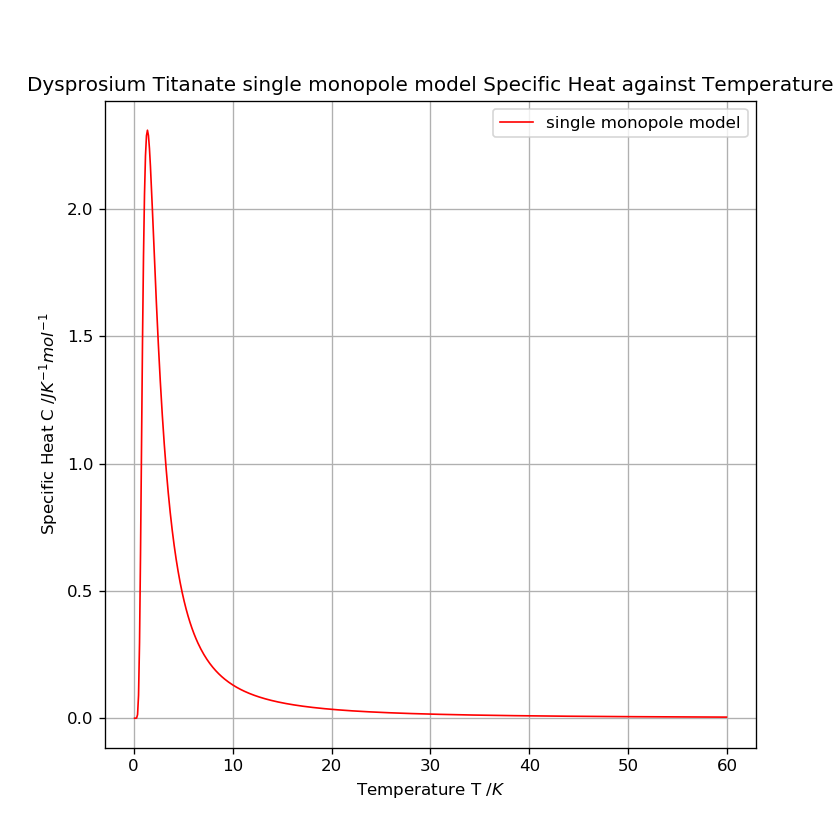

<IPython.core.display.Javascript object>


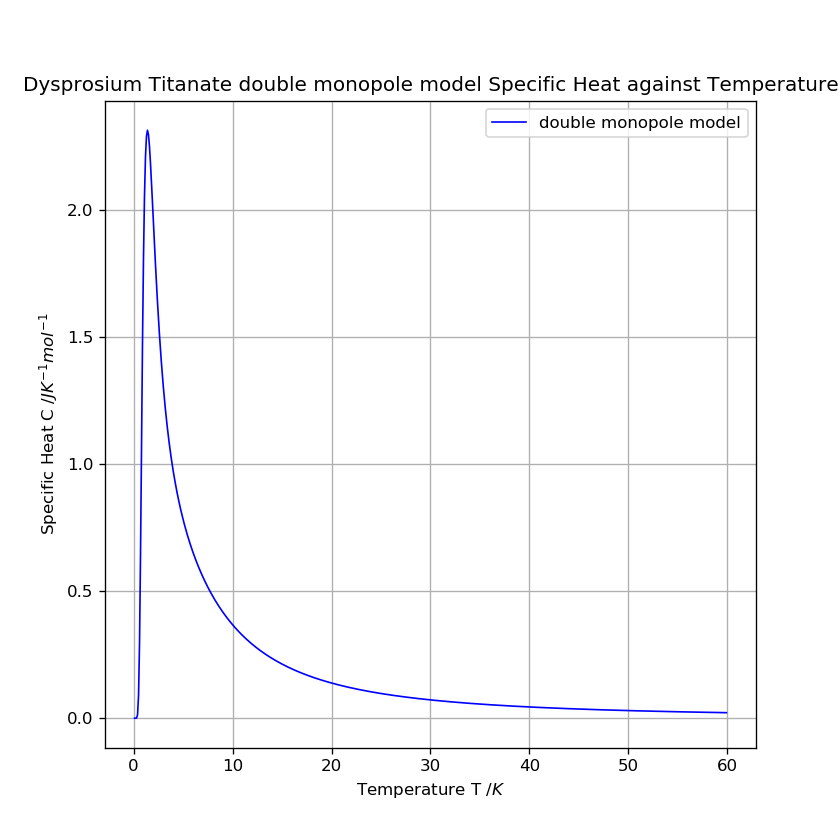

<IPython.core.display.Javascript object>


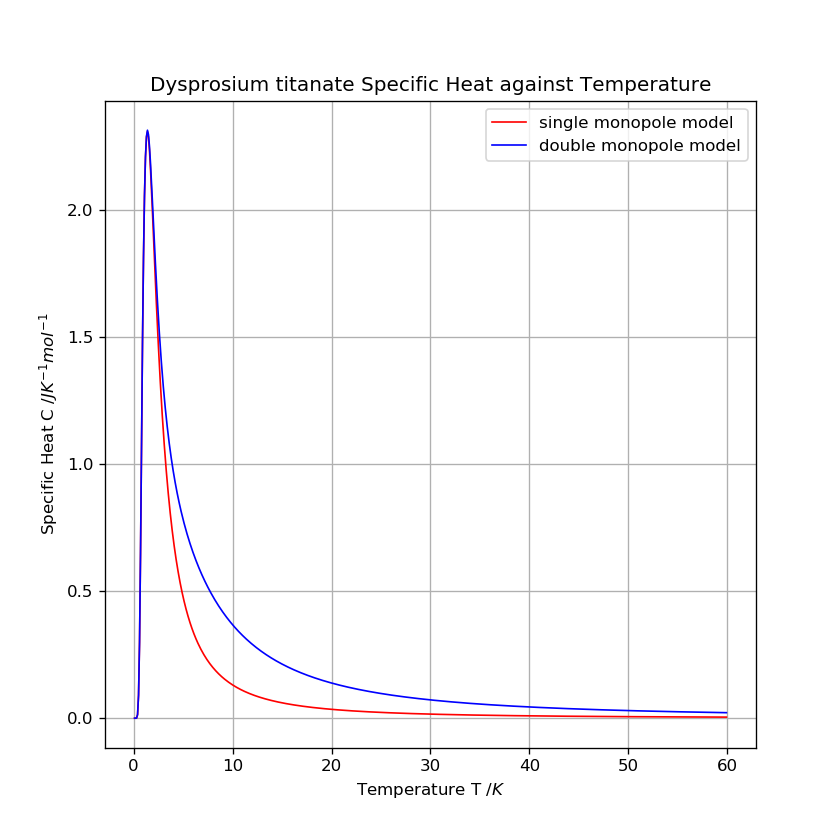

In [6]:
###plots###

##single monopole only##
graph1 = plt.figure(figsize=(7,7))
plt.grid(True)
plt.plot(TempArray, (SpecHeatArray/2), "r-", linewidth=1.0, label="single monopole model")
plt.xlabel('Temperature T $/K$')
plt.ylabel('Specific Heat C $/J K^{-1} mol^{-1}$')
plt.legend(loc='upper right')
plt.title('Dysprosium Titanate single monopole model Specific Heat against Temperature')
plt.savefig('Single monopole model Specific Heat against Temperature.png')

##double monopole only##
graph2 = plt.figure(figsize=(7,7))
plt.grid(True)
plt.plot(TempArray_double, (SpecHeatArray_double/2), "b-", linewidth=1.0, label="double monopole model")
plt.xlabel('Temperature T $/K$')
plt.ylabel('Specific Heat C $/J K^{-1} mol^{-1}$')
plt.legend(loc='upper right')
plt.title('Dysprosium Titanate double monopole model Specific Heat against Temperature')
plt.savefig('Double monopole model Specific Heat against Temperature.png')

##both models together##
graph3 = plt.figure(figsize=(7,7))
plt.grid(True)
plt.plot(TempArray, (SpecHeatArray/2), "r-", linewidth=1.0, label="single monopole model")
plt.plot(TempArray_double, (SpecHeatArray_double/2), "b-", linewidth=1.0, label="double monopole model")
plt.xlabel('Temperature T $/K$')
plt.ylabel('Specific Heat C $/J K^{-1} mol^{-1}$')
plt.legend(loc='upper right')
plt.title('Dysprosium titanate Specific Heat against Temperature')
plt.savefig('Single and double monopole models Specific Heat against Temperature.png')


<IPython.core.display.Javascript object>


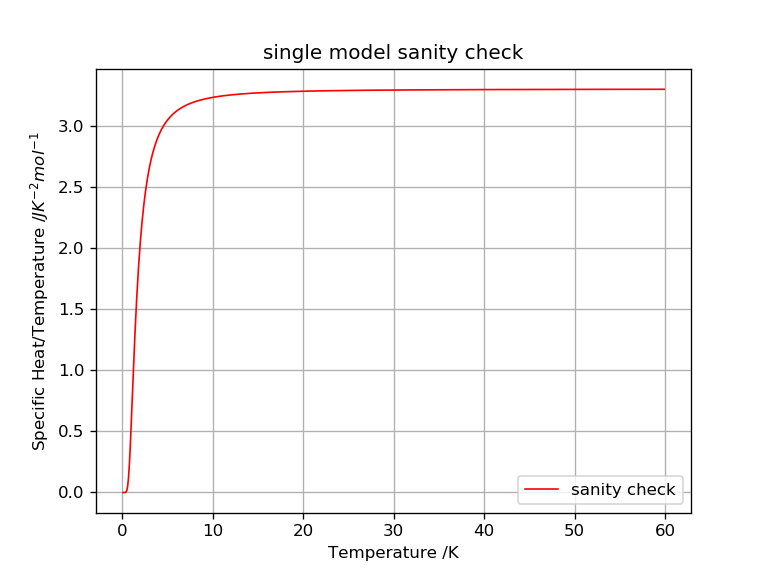

<IPython.core.display.Javascript object>


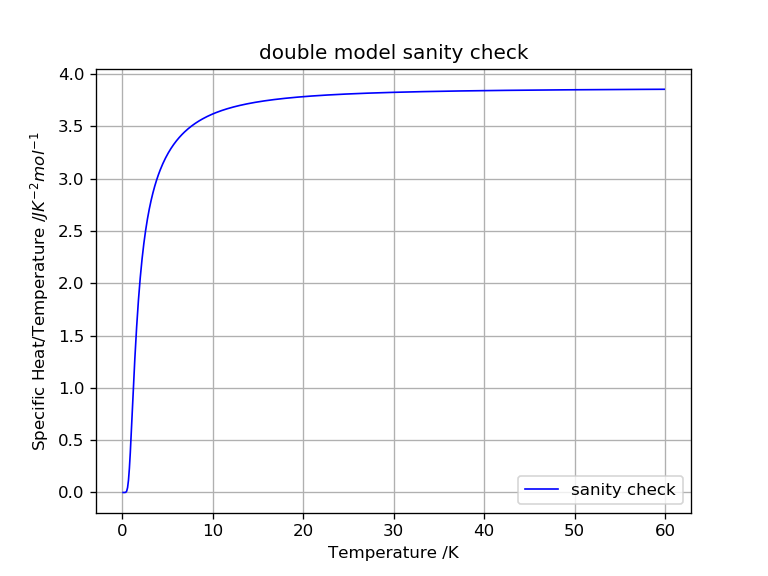

<IPython.core.display.Javascript object>


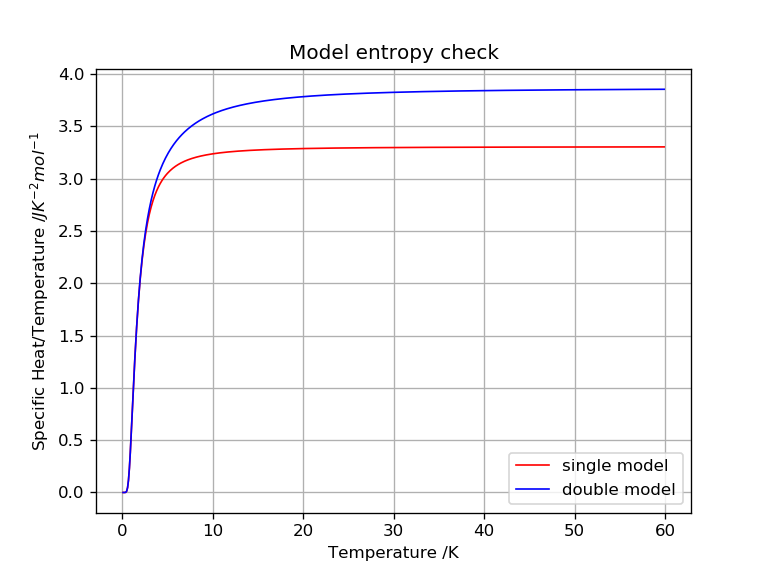

<IPython.core.display.Javascript object>


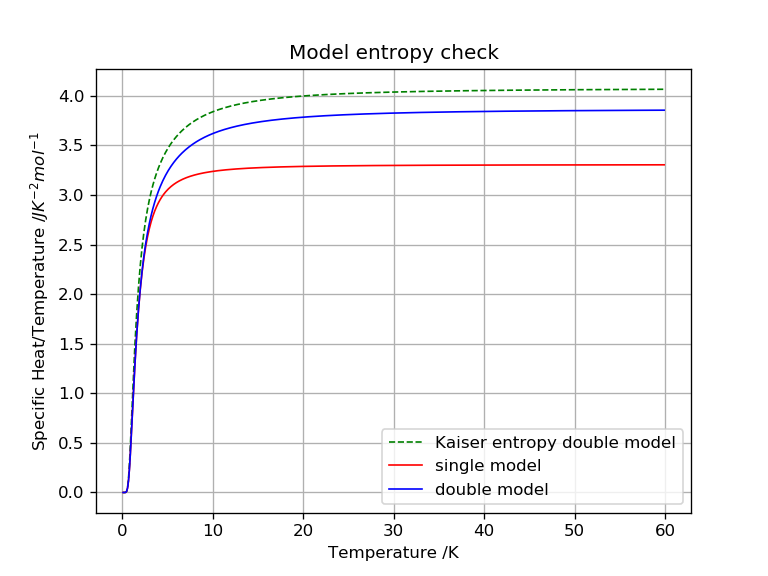

In [4]:
###quick sanity check###

##single monopole model##
DeltaS = cumtrapz((SpecHeatArray/2)/TempArray, TempArray)
DeltaS = np.insert(DeltaS,0,0, axis=0)

##double monopole model##
DeltaS_double = cumtrapz((SpecHeatArray_double/2)/TempArray_double, TempArray_double)
DeltaS_double = np.insert(DeltaS_double,0,0, axis=0)

##single plot##
sangraph1 = plt.figure()
plt.grid(True)
plt.plot(TempArray, DeltaS, "r-", linewidth=1.0, label="sanity check")
plt.xlabel("Temperature /K")
plt.ylabel("Specific Heat/Temperature /$J K^{-2} mol^{-1} $")
plt.title("single model sanity check")
plt.legend(loc="lower right")

##double plot##
sangraph2 = plt.figure()
plt.grid(True)
plt.plot(TempArray_double, DeltaS_double, "b-", linewidth=1.0, label="sanity check")
plt.xlabel("Temperature /K")
plt.ylabel("Specific Heat/Temperature /$J K^{-2} mol^{-1} $")
plt.title("double model sanity check")
plt.legend(loc="lower right")

##double and single plot##
sangraph2 = plt.figure()
plt.grid(True)
plt.plot(TempArray, DeltaS, "r-", linewidth=1.0, label="single model")
plt.plot(TempArray_double, DeltaS_double, "b-", linewidth=1.0, label="double model")
plt.xlabel("Temperature /K")
plt.ylabel("Specific Heat/Temperature /$J K^{-2} mol^{-1} $")
plt.title("Model entropy check")
plt.legend(loc="lower right")
plt.savefig('SanityCheck.png')

###Kaiser entropy###
#S = -k_B * N_0 * ( (n_array*np.log(n_array/2)) )
EntropyArray = (EntropyArray/2) - (8.314 * 1/2*np.log(3/2))
graph4 = plt.figure()
plt.grid(True)
plt.plot(TempArray_double, EntropyArray, "g--", linewidth=1.0, label="Kaiser entropy double model")
plt.plot(TempArray, DeltaS, "r-", linewidth=1.0, label="single model")
plt.plot(TempArray_double, DeltaS_double, "b-", linewidth=1.0, label="double model")
plt.xlabel("Temperature /K")
plt.ylabel("Specific Heat/Temperature /$J K^{-2} mol^{-1} $")
plt.title("Model entropy check")
plt.legend(loc="lower right")
plt.savefig('SanityCheckTempMu4dot35.png')

In [5]:
print(DeltaS)

[0.00000000e+00 2.35192436e-07 1.01701866e-04 1.96287232e-03
 1.27478468e-02 4.66047604e-02 1.17813130e-01 2.31282100e-01
 3.80636139e-01 5.53624255e-01 7.37807977e-01 9.23321289e-01
 1.10340144e+00 1.27393580e+00 1.43276559e+00 1.57905918e+00
 1.71282674e+00 1.83457846e+00 1.94509455e+00 2.04527657e+00
 2.13605689e+00 2.21834469e+00 2.29299625e+00 2.36080043e+00
 2.42247366e+00 2.47866035e+00 2.52993647e+00 2.57681470e+00
 2.61975028e+00 2.65914683e+00 2.69536223e+00 2.72871347e+00
 2.75948143e+00 2.78791558e+00 2.81423760e+00 2.83864472e+00
 2.86131268e+00 2.88239828e+00 2.90204170e+00 2.92036844e+00
 2.93749105e+00 2.95351067e+00 2.96851828e+00 2.98259592e+00
 2.99581766e+00 3.00825050e+00 3.01995512e+00 3.03098661e+00
 3.04139502e+00 3.05122590e+00 3.06052079e+00 3.06931761e+00
 3.07765101e+00 3.08555275e+00 3.09305191e+00 3.10017522e+00
 3.10694722e+00 3.11339053e+00 3.11952597e+00 3.12537277e+00
 3.13094868e+00 3.13627011e+00 3.14135228e+00 3.14620928e+00
 3.15085418e+00 3.155299

In [ ]:
muGraph = plt.figure()
plt.grid(True)
#plt.plot(TempArray, -muSingleArray/k_B, "r--", label="Single")
plt.plot(TempArray_double, -muDoubleArray/k_B, "b--", label="Single+Double mu")
plt.plot(TempArray_double, -mu2DoubleArray/k_B, "g--", label="Single+Double mu2")
plt.plot(TempArray_double, mu2DoubleArray/muDoubleArray, "r-", label="ratio")
plt.xlabel("Temperature /K")
plt.ylabel("Chemical potential /K")
plt.legend(loc="center right")
plt.savefig('ChemPotentialModAgainstTemperature.pdf')


In [ ]:
asdf = -4.83902941562879e-23/k_B
print(asdf)

6.02214e+23
0.9999999999999999
2.087498034820004


<IPython.core.display.Javascript object>


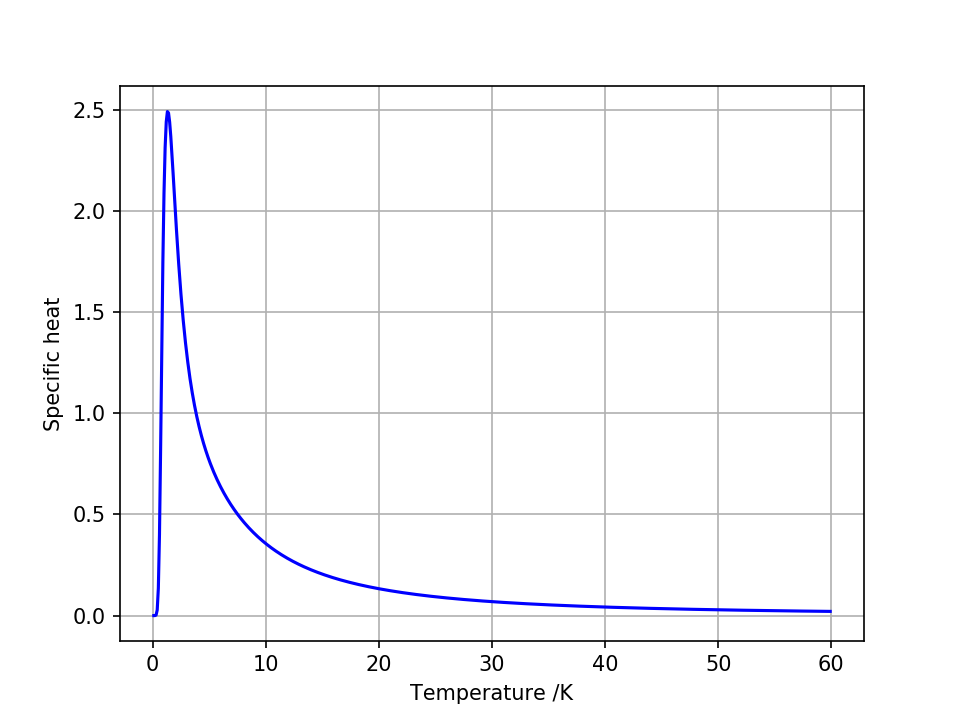

<IPython.core.display.Javascript object>


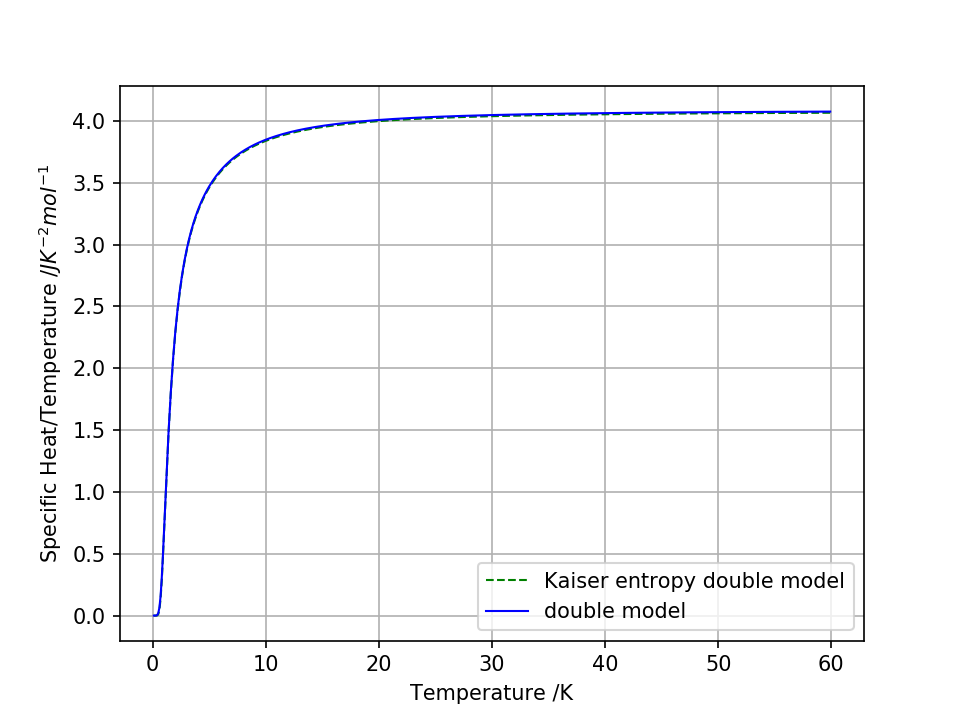

In [3]:

print(N_0)
DiffNumerical = np.gradient(nArray, 0.1)
Diff_2Numerical = np.gradient(n_2Array, 0.1)
SpecHeat = - 1/2 * N_0 * ((muDoubleArray * DiffNumerical) + (mu2DoubleArray * Diff_2Numerical))
print(TempArray_double[9])
print(SpecHeat[9])
NumericalGraph = plt.figure()
plt.grid(True)
plt.plot(TempArray_double, SpecHeat, "b-", label="Single+Double")
plt.xlabel("Temperature /K")
plt.ylabel("Specific heat")

NumEntropyDouble = cumtrapz((SpecHeat)/TempArray_double, TempArray_double)
NumEntropyDouble = np.insert(NumEntropyDouble,0,0, axis=0)
EntropyArray2 = (EntropyArray/2) - (8.314 * 1/2*np.log(3/2))
Graph1234 = plt.figure()
plt.grid(True)
plt.plot(TempArray_double, EntropyArray2, "g--", linewidth=1.0, label="Kaiser entropy double model")
#plt.plot(TempArray, Delta, "r-", linewidth=1.0, label="single model")
plt.plot(TempArray_double, NumEntropyDouble, "b-", linewidth=1.0, label="double model")
plt.xlabel("Temperature /K")
plt.ylabel("Specific Heat/Temperature /$J K^{-2} mol^{-1} $")
plt.legend()